In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
df=pd.read_csv('/content/in-vehicle-coupon-recommendation.csv')

In [21]:
df.describe()
df.shape

(12684, 26)

In [22]:
df.dtypes

,0
destination,object
passanger,object
weather,object
temperature,int64
time,object
coupon,object
expiration,object
gender,object
age,object
maritalStatus,object


In [23]:
for col in df.columns:
    print(f"Value counts for {col}:")
    print(df[col].value_counts(dropna=False))  # Includes NaN counts
    print(f"Missing values: {df[col].isna().sum()}")  # Shows total missing values
    print("-" * 50)

Value counts for destination:
destination
No Urgent Place    6283
Home               3237
Work               3164
Name: count, dtype: int64
Missing values: 0
--------------------------------------------------
Value counts for passanger:
passanger
Alone        7305
Friend(s)    3298
Partner      1075
Kid(s)       1006
Name: count, dtype: int64
Missing values: 0
--------------------------------------------------
Value counts for weather:
weather
Sunny    10069
Snowy     1405
Rainy     1210
Name: count, dtype: int64
Missing values: 0
--------------------------------------------------
Value counts for temperature:
temperature
80    6528
55    3840
30    2316
Name: count, dtype: int64
Missing values: 0
--------------------------------------------------
Value counts for time:
time
6PM     3230
7AM     3164
10AM    2275
2PM     2009
10PM    2006
Name: count, dtype: int64
Missing values: 0
--------------------------------------------------
Value counts for coupon:
coupon
Coffee House          

In [24]:
#dropped columns car and 'toCoupon_GEQ5min' from the dataframe
#as thare is only 1 value in the data
df.shape
df = df.drop(columns=['car', 'toCoupon_GEQ5min'], errors='ignore')

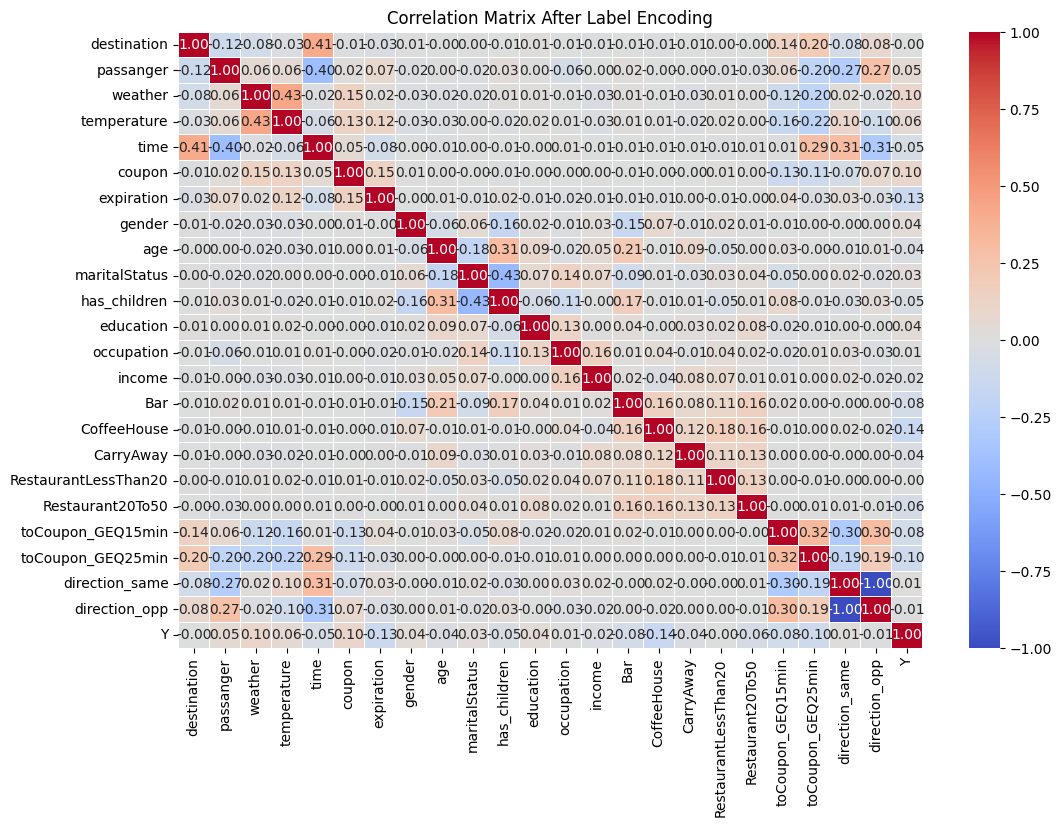

In [26]:
from sklearn.preprocessing import LabelEncoder

# Identify categorical columns
cat_cols = df.select_dtypes(include=['object', 'category']).columns

# Apply label encoding
label_encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Store encoder if needed later

# Now, compute correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix After Label Encoding")
plt.show()

In [28]:
df = df.fillna(df.mode().iloc[0])
df.shape

(12684, 24)

In [29]:
df = df.loc[:, ~df.columns.duplicated()]
df.shape

(12684, 24)

In [30]:
df.to_csv('CLEANED_CLASS_DATA.csv', index=False)
